In [1]:
import pandas as pd
import ast
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from darts import TimeSeries
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
from joblib import dump, load
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import GridSearchCV
import cv2
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [11]:
for dd in range(57):
    original_data = pd.read_csv("../participant_wise_data/participant_{}_data.csv".format(dd))
    data = list()
    for i in range(len(original_data)):
        temp = list()
        temp.append(original_data.iloc[i,0])
        temp.append(original_data.iloc[i,1])
        list_data = ast.literal_eval(original_data.iloc[i,2])
        temp.append(list_data)
        temp.append(original_data.iloc[i,3])
        data.append(temp)
    df = pd.DataFrame(data)
    X = df.iloc[:,2]
    y = df.iloc[:,3]

    time_series_data = X
    targets = y

    data = pd.DataFrame({'time_series_data': time_series_data, 'target': targets})

    X = np.array(data['time_series_data'].tolist())  # Convert the list of lists to a numpy array
    y = np.array(data['target'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    y_train_target = list()
    for j in y_train:
        temp = ast.literal_eval(j)
        y_train_target.append(temp)

    y_test_target = list()
    for k in y_test:
        temp = ast.literal_eval(k)
        y_test_target.append(temp)

    # rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
    # rf_regressor.fit(X_train, y_train_target)
    # y_pred = rf_regressor.predict(X_test)
    # mse = mean_squared_error(y_test_target, y_pred)
    # # print(y_pred)
    # print("=====================================================================")
    # print("Mean Squared Error:", mse)
    # mae = mean_absolute_error(y_test_target, y_pred)
    # print("Mean Absolute Error:", mae)
    # r2 = r2_score(y_test_target, y_pred)
    # print("R-squared Score:", r2)
    # print("=====================================================================")
    # dump(rf_regressor, '../participant_wise_models/participant_{}_model.joblib'.format(dd))
    parameters = {
        'max_depth': [3,4],
        'cv': 5
    }
    regr = RandomForestRegressor(random_state=0)

    clf = GridSearchCV(regr, parameters)
    clf.fit(X_train, y_train_target)
    print("=====================================================================")
    y_pred_train = clf.predict(X_train)
    print(mean_squared_error(y_train_target, y_pred_train))

    y_pred = clf.predict(X_test)
    print(mean_squared_error(y_test_target, y_pred))
    print("=====================================================================")
    dump(clf, '../participant_wise_models/participant_{}_model.joblib'.format(dd))

0.942417180175024
1.7755754021911028
1.3260559180680833
2.0561841782696764
0.6495057013298097
1.1603828295959087
0.7372308589093672
1.685393625523307
1.006398050495006
1.557698397768938
1.0215450464460394
1.6955338055877782
1.0088124102688871
1.7058888747295615
0.7243938762619917
1.567964761037281
1.16780274992019
1.9344411673089095
0.900460990242268
1.4091191354282548
0.829849418306672
1.355252460809221
1.06774664624539
1.958536472389027
1.2255025650729565
2.1649815026860364
0.6980737990251626
1.4710881177084716
1.088971741695866
2.065848922565252
0.7489168739432344
1.3998237178394408
1.0077226829856814
1.7780104618397092
1.4840477925616122
2.0921631819155166
0.6604967250729321
1.3637597871972753
0.9410409627750292
1.8170996612844286
1.443633851939683
2.287486036287845
0.7603043586279947
1.6136886363043383
0.9119272142377076
1.551746489569129
0.8314029852959842
1.356230301361172
1.0054656562656763
1.7592607205942867
0.8552110436420772
1.3013126556859629
1.1560548871443903
2.0239935298

### Target are being scaled to image size and then being trained

In [5]:
image = cv2.imread('../../new_data_training/points.jpg')
image_height, image_width, _ = image.shape

for dd in range(57):
    original_data = pd.read_csv("../participant_wise_data/participant_{}_data.csv".format(dd))
    data = list()
    for i in range(len(original_data)):
        temp = list()
        temp.append(original_data.iloc[i,0])
        temp.append(original_data.iloc[i,1])
        list_data = ast.literal_eval(original_data.iloc[i,2])
        temp.append(list_data)
        temp.append(original_data.iloc[i,3])
        data.append(temp)
    df = pd.DataFrame(data)
    X = df.iloc[:,2]
    y = df.iloc[:,3]

    time_series_data = X
    targets = y

    data = pd.DataFrame({'time_series_data': time_series_data, 'target': targets})

    X = np.array(data['time_series_data'].tolist())  # Convert the list of lists to a numpy array
    y = np.array(data['target'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    y_train_target = list()
    for j in y_train:
        temp = ast.literal_eval(j)
        y_train_target.append(temp)

    y_test_target = list()
    for k in y_test:
        temp = ast.literal_eval(k)
        y_test_target.append(temp)
    
    
    scaled_y_train_target = [(int(x * image_width), int(y * image_height)) for x, y in y_train_target]
    scaled_y_test_target = [(int(x * image_width), int(y * image_height)) for x, y in y_test_target]

    # rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
    # rf_regressor.fit(X_train, y_train_target)
    # y_pred = rf_regressor.predict(X_test)
    # mse = mean_squared_error(y_test_target, y_pred)
    # # print(y_pred)
    # print("=====================================================================")
    # print("Mean Squared Error:", mse)
    # mae = mean_absolute_error(y_test_target, y_pred)
    # print("Mean Absolute Error:", mae)
    # r2 = r2_score(y_test_target, y_pred)
    # print("R-squared Score:", r2)
    # print("=====================================================================")
    # dump(rf_regressor, '../participant_wise_models/participant_{}_model.joblib'.format(dd))
    parameters = {
        'max_depth': [3,4]
    }
    regr = RandomForestRegressor(random_state=0)

    clf = GridSearchCV(regr, parameters, cv=5)
    clf.fit(X_train, scaled_y_train_target)
    print("=====================================================================")
    y_pred_train = clf.predict(X_train)
    print(mean_squared_error(scaled_y_train_target, y_pred_train))

    y_pred = clf.predict(X_test)
    print(mean_squared_error(scaled_y_test_target, y_pred))
    print("=====================================================================")
    dump(clf, '../participant_wise_models/scaled_models/participant_{}_model.joblib'.format(dd))

579235.1619929485
1023886.0837058001
1035109.5178408751
1550111.712275396
389586.6935196815
653307.8468329514
565052.6597804727
1071197.6617129762
710061.0909522701
1092041.5006191253
738814.9732025632
1116219.2812322048
620299.8107805206
1016691.6003721076
437424.2679196145
851895.7398178058
774620.3245304693
1362748.3273923602
535430.6330973342
785961.5698513539
534439.7141636747
891235.917236872
649496.6545776981
1106145.6393241538
864222.8889112601
1523215.7172823849
389894.84435814136
780962.0918557112
752806.3190294679
1260764.5959326145
485455.8556960485
902615.4139202887
563623.6365642125
997257.105162334
932599.9019738843
1383872.8317664072
425830.62738827063
801771.1253866568
519899.67050131777
1014447.0575863286
960455.0786936381
1550518.0457128198
408644.06759889884
688681.1672390903
609715.1299513835
923233.5048991853
456258.96703392704
747241.3096856197
584299.7396332707
1002450.0742478669
446302.0443851735
732018.4269834958
676573.8896797412
1166515.7427842838
647773.512

# Saving test and train data of participants so that predictions can be performed with the models

In [3]:
for dd in range(57):
    original_data = pd.read_csv("../participant_wise_data/participant_{}_data.csv".format(dd))
    data = list()
    for i in range(len(original_data)):
        temp = list()
        temp.append(original_data.iloc[i,0])
        temp.append(original_data.iloc[i,1])
        list_data = ast.literal_eval(original_data.iloc[i,2])
        temp.append(list_data)
        temp.append(original_data.iloc[i,3])
        data.append(temp)
    df = pd.DataFrame(data)
    X = df.iloc[:,2]
    y = df.iloc[:,3]

    time_series_data = X
    targets = y

    data = pd.DataFrame({'time_series_data': time_series_data, 'target': targets})

    X = np.array(data['time_series_data'].tolist())  # Convert the list of lists to a numpy array
    y = np.array(data['target'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    #########################################################################################
    X_test_series = pd.Series([x.tolist() for x in X_test])
    y_test_series = pd.Series(y_test)

    df_list = [X_test_series, y_test_series]
    df= pd.concat(df_list, axis=1)
    csv_filename = '../participant_wise_test_data/participant_{}_test_data.csv'.format(dd)

    df.to_csv(csv_filename, index=False)
    print(f'Data has been saved to {csv_filename}')
    #########################################################################################
    X_train_series = pd.Series([x.tolist() for x in X_train])
    y_train_series = pd.Series(y_train)

    df1_list = [X_train_series, y_train_series]
    df1= pd.concat(df1_list, axis=1)
    csv_filename_1 = '../participant_wise_train_data/participant_{}_train_data.csv'.format(dd)

    df1.to_csv(csv_filename_1, index=False)
    print(f'Data has been saved to {csv_filename_1}')
    #########################################################################################

    y_train_target = list()
    for j in y_train:
        temp = ast.literal_eval(j)
        y_train_target.append(temp)

    y_test_target = list()
    for k in y_test:
        temp = ast.literal_eval(k)
        y_test_target.append(temp)

    # rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
    # rf_regressor.fit(X_train, y_train_target)
    # y_pred = rf_regressor.predict(X_test)
    # mse = mean_squared_error(y_test_target, y_pred)
    # # print(y_pred)
    # print("=====================================================================")
    # print("Mean Squared Error:", mse)
    # mae = mean_absolute_error(y_test_target, y_pred)
    # print("Mean Absolute Error:", mae)
    # r2 = r2_score(y_test_target, y_pred)
    # print("R-squared Score:", r2)
    # print("=====================================================================")
    # dump(rf_regressor, '../participant_wise_models/participant_{}_model.joblib'.format(dd))
        
    parameters = {
        'n_estimators': [150]
    }
    regr = RandomForestRegressor(random_state=0)

    clf = GridSearchCV(regr, parameters, cv=5)
    clf.fit(X_train, y_train_target)
    print("=====================================================================")
    y_pred_train = clf.predict(X_train)
    y_pred = clf.predict(X_test)

    print("MSE Train prediction",mean_squared_error(y_train_target, y_pred_train))
    print("MSE Test prediction",mean_squared_error(y_test_target, y_pred))

    print("RMSE Train prediction",mean_squared_error(y_train_target, y_pred_train, squared=False))
    print("RMSE Test prediction",mean_squared_error(y_test_target, y_pred, squared=False))
    print("=====================================================================")
    dump(clf, '../participant_wise_models/participant_{}_model.joblib'.format(dd))

Data has been saved to ../participant_wise_test_data/participant_0_test_data.csv
Data has been saved to ../participant_wise_train_data/participant_0_train_data.csv
MSE Train prediction 0.17676473577235768
MSE Test prediction 1.415850275807724
RMSE Train prediction 0.3391608542830657
RMSE Test prediction 0.9677264630689824
Data has been saved to ../participant_wise_test_data/participant_1_test_data.csv
Data has been saved to ../participant_wise_train_data/participant_1_train_data.csv
MSE Train prediction 0.11421272264631038
MSE Test prediction 0.9520596532702914
RMSE Train prediction 0.3209475023664702
RMSE Test prediction 0.8989024312710339
Data has been saved to ../participant_wise_test_data/participant_2_test_data.csv
Data has been saved to ../participant_wise_train_data/participant_2_train_data.csv
MSE Train prediction 0.08319867886178865
MSE Test prediction 0.6908828211189917
RMSE Train prediction 0.22919396899831618
RMSE Test prediction 0.6672698706670651
Data has been saved to ..

# Training the model after subject specific Normalization

In [14]:
def subject_specific_normalization(gaze_data):
  """
  This function normalizes gaze data for each subject based on their gaze range.

  Args:
      gaze_data (dict): Dictionary containing gaze data for all subjects and time points.

  Returns:
      dict: Normalized gaze data with subject-specific scaling factors.
  """
  normalized_gaze_data = []
  for subject_data in gaze_data:
    # Find minimum and maximum gaze positions for this subject
    min_data = np.min(subject_data)
    max_data = np.max(subject_data)

    # Calculate scaling factors for x and y coordinates
    scaling_factor_data = 1.0 / (max_data - min_data)

    # Apply scaling to subject's gaze data
    normalized_subject_data = []
    for gaze in subject_data:
      gaze_new = (gaze - min_data) * scaling_factor_data
      normalized_subject_data.append(gaze_new)
    normalized_gaze_data.append(normalized_subject_data)
  # print(np.all(np.isnan(normalized_gaze_data)))

  return normalized_gaze_data


False
False
MSE Train prediction 0.2150414972899728
MSE Test prediction 1.9162914893617016
RMSE Train prediction 0.38605714658658385
RMSE Test prediction 1.1423304540939963


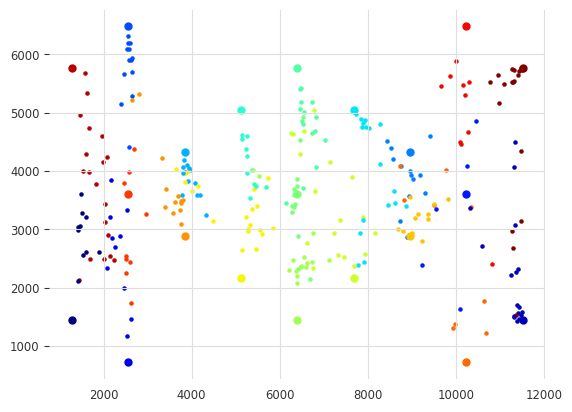

False
False
MSE Train prediction 0.1279481594571672
MSE Test prediction 1.0744479117415295
RMSE Train prediction 0.3287699819282484
RMSE Test prediction 0.9295745811171623


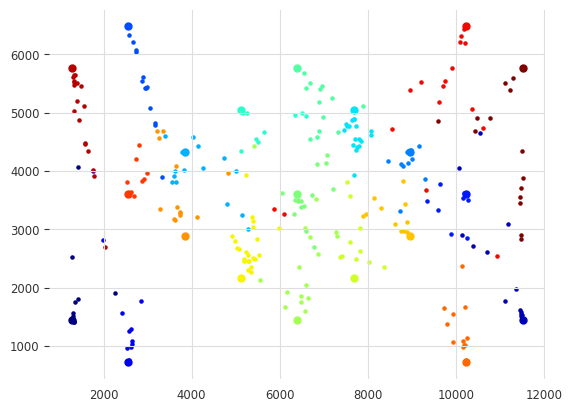

False
False
MSE Train prediction 0.10782310298102962
MSE Test prediction 1.0613677698975568
RMSE Train prediction 0.27407410286642964
RMSE Test prediction 0.9137392287896156


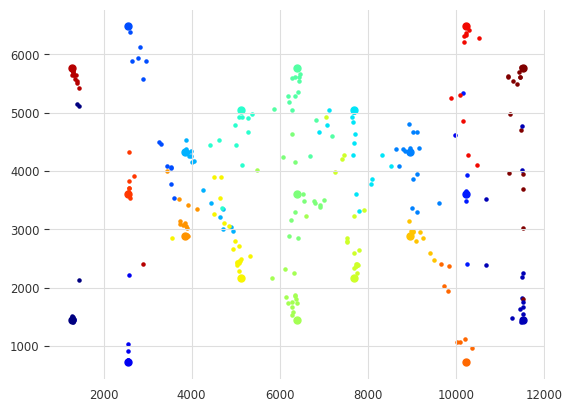

In [18]:
for dd in range(3):
    original_data = pd.read_csv("../participant_wise_data/participant_{}_data.csv".format(dd))
    data = list()
    for i in range(len(original_data)):
        temp = list()
        temp.append(original_data.iloc[i,0])
        temp.append(original_data.iloc[i,1])
        list_data = ast.literal_eval(original_data.iloc[i,2])
        temp.append(list_data)
        temp.append(ast.literal_eval(original_data.iloc[i,3]))
        data.append(temp)
    df = pd.DataFrame(data)
    X = df.iloc[:,2]
    y = df.iloc[:,3]

    time_series_data = X
    targets = y

    data = pd.DataFrame({'time_series_data': time_series_data, 'target': targets})

    X = np.array(data['time_series_data'].tolist())  # Convert the list of lists to a numpy array
    y = np.array(data['target'].tolist())

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    #=====================================================================
    new_X_train_data = []
    for time_series in X_train:
        temp = []
        for element in time_series:
            temp.append(element)
        new_X_train_data.append(temp)
    X_train_ = subject_specific_normalization(new_X_train_data)
    # print(X_train[0])
    #=====================================================================
    new_X_test_data = []
    for time_series in X_test:
        temp = []
        for element in time_series:
            temp.append(element)
        new_X_test_data.append(temp)
    X_test_ = subject_specific_normalization(new_X_test_data)
    # print(X_test[0])
    #=====================================================================
    new_y_train_data = []
    for time_series in y_train:
        temp = []
        for element in time_series:
            temp.append(element)
        new_y_train_data.append(temp)
    y_train_ = new_y_train_data
    # print(y_train[0])
    #=====================================================================
    new_y_test_data = []
    for time_series in y_test:
        temp = []
        for element in time_series:
            temp.append(element)
        new_y_test_data.append(temp)
    y_test_ = new_y_test_data
    # print(y_test[0])
    ###############################################################################
    # rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
    # rf_regressor.fit(X_train_, y_train_)
    # y_pred = rf_regressor.predict(X_test_)
    # mse = mean_squared_error(y_test_, y_pred)
    # # print(y_pred)
    # print("=====================================================================")
    # print("Mean Squared Error:", mse)
    # mae = mean_absolute_error(y_test_, y_pred)
    # print("Mean Absolute Error:", mae)
    # r2 = r2_score(y_test_, y_pred)
    # print("R-squared Score:", r2)
    # print("=====================================================================")
    # dump(rf_regressor, '../participant_wise_models/participant_{}_model.joblib'.format(dd))
        
    parameters = {
        'n_estimators': [150]
    }
    regr = RandomForestRegressor(random_state=0)

    clf = GridSearchCV(regr, parameters, cv=5)
    clf.fit(X_train_, y_train_)
    print("=====================================================================")
    y_pred_train = clf.predict(X_train_)
    y_pred = clf.predict(X_test_)

    print("MSE Train prediction",mean_squared_error(y_train_, y_pred_train))
    print("MSE Test prediction",mean_squared_error(y_test_, y_pred))

    print("RMSE Train prediction",mean_squared_error(y_train_, y_pred_train, squared=False))
    print("RMSE Test prediction",mean_squared_error(y_test_, y_pred, squared=False))
    print("=====================================================================")
    dump(clf, '../participant_wise_models/subject_specific_normalized_models/participant_{}_model.joblib'.format(dd))
    # ##################################################################################################################

    target_colors = plt.cm.jet(np.linspace(0, 1, 21))

    target = [[1,2],[1,8],[2,1],[2,5],[2,9],[3,4],[3,6],[4,3],[4,7],[5,2],[5,5],[5,8],[6,3],[6,7],[7,4],[7,6],[8,1],[8,5],[8,9],[9,2],[9,8]]
    color_list = {str([1,2]): target_colors[0],str([1,8]): target_colors[19],str([2,1]): target_colors[2],str([2,5]):target_colors[17],str([2,9]):target_colors[4],str([3,4]):target_colors[15],str([3,6]):target_colors[6],str([4,3]):target_colors[13],str([4,7]):target_colors[8],str([5,2]):target_colors[11],str([5,5]):target_colors[10],str([5,8]):target_colors[9],str([6,3]):target_colors[12],str([6,7]):target_colors[7],str([7,4]):target_colors[14],str([7,6]):target_colors[5],str([8,1]):target_colors[16],str([8,5]):target_colors[3],str([8,9]):target_colors[18],str([9,2]):target_colors[1],str([9,8]):target_colors[20]}

    image = cv2.imread('../../new_data_training/points.jpg')
    image_height, image_width, _ = image.shape
    # scaled_targets = [(int(x * image_width), int(y * image_height)) for x, y in target]

    scaled_predicted_points = [(int(x * image_width), int(y * image_height)) for x, y in y_pred]
    scaled_target_points_color = [color_list[str(i)] for i in y_test_]

    counter = 0
    for point in scaled_predicted_points:
        plt.scatter(point[0], point[1], color=scaled_target_points_color[counter], s=5, marker='o')  # Adjust marker size and color as needed
        counter += 1

    for point in target:
        plt.scatter(int(point[0] * image_width), int(point[1] * image_height), color=color_list[str(point)], s=25, marker='o')  # Adjust marker size and color as needed


    # Show the plot
    plt.show()

# Training the model after performing normalization and outlier detection

In [22]:
def outlier_detection_replacement(data, threshold=3.5, method="zscore"):
  """
  This function detects outliers in time series data and replaces them with the mean using Z-score or IQR.

  Args:
      data (np.array): Time series data with multiple features (landmarks x time points).
      threshold (float, optional): Threshold for outlier detection (defaults to 3.5 for Z-score).
      method (str, optional): Outlier detection method ("zscore" or "iqr", defaults to "zscore").

  Returns:
      np.array: Time series data with outliers replaced by the mean.
  """
  if method not in ["zscore", "iqr"]:
    raise ValueError("Invalid method. Choose 'zscore' or 'iqr'.")

  cleaned_data = []
  for landmark_data in data:
    mean = np.mean(landmark_data)
    if method == "zscore":
      # Z-score outlier detection and replacement
      std = np.std(landmark_data)
      z_scores = (landmark_data - mean) / std
      cleaned_landmark_data = np.where(np.abs(z_scores) >= threshold, mean, landmark_data)
    else:
      # IQR outlier detection and replacement
      q1 = np.percentile(landmark_data, 25)
      q3 = np.percentile(landmark_data, 75)
      iqr = q3 - q1
      lower_bound = q1 - (threshold * iqr)
      upper_bound = q3 + (threshold * iqr)
      cleaned_landmark_data = np.where((landmark_data < lower_bound) | (landmark_data > upper_bound), mean, landmark_data)

    cleaned_data.append(cleaned_landmark_data)

  return cleaned_data



# def subject_specific_normalization(gaze_data):
#   """
#   This function normalizes gaze data for each subject based on their gaze range.

#   Args:
#       gaze_data (dict): Dictionary containing gaze data for all subjects and time points.

#   Returns:
#       dict: Normalized gaze data with subject-specific scaling factors.
#   """
#   normalized_gaze_data = []
#   for subject_data in gaze_data:
#     # Find minimum and maximum gaze positions for this subject
#     min_data = np.min(subject_data)
#     max_data = np.max(subject_data)

#     # Calculate scaling factors for x and y coordinates
#     scaling_factor_data = 1.0 / (max_data - min_data)

#     # Apply scaling to subject's gaze data
#     normalized_subject_data = []
#     for gaze in subject_data:
#       gaze_new = (gaze - min_data) * scaling_factor_data
#       normalized_subject_data.append(gaze_new)
#     normalized_gaze_data.append(normalized_subject_data)
#   # print(np.all(np.isnan(normalized_gaze_data)))

#   return normalized_gaze_data






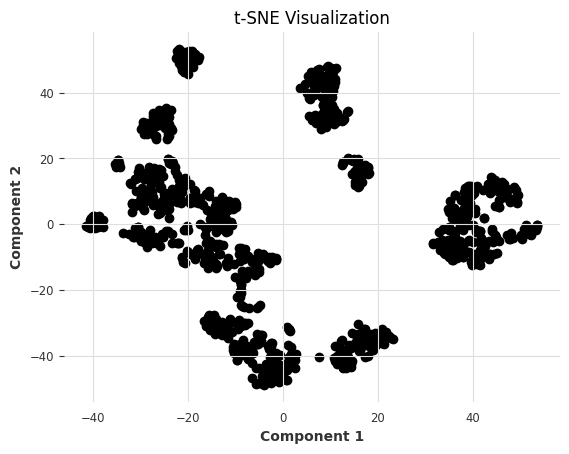

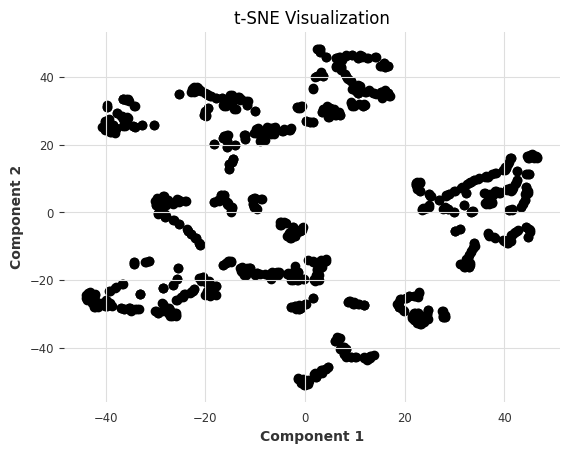

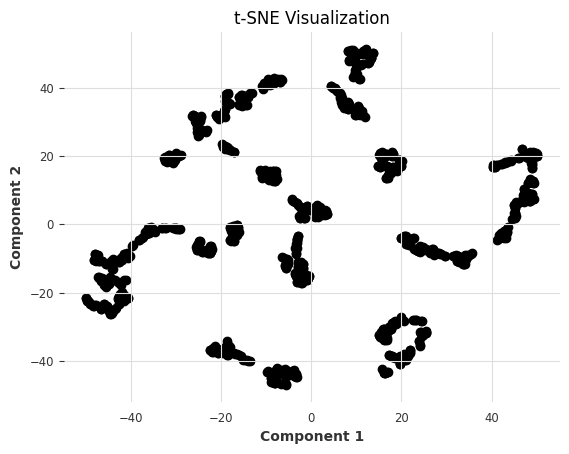

In [7]:
for dd in range(3):
    original_data = pd.read_csv("../participant_wise_data/participant_{}_data.csv".format(dd))
    data = list()
    for i in range(len(original_data)):
        temp = list()
        temp.append(original_data.iloc[i,0])
        temp.append(original_data.iloc[i,1])
        list_data = ast.literal_eval(original_data.iloc[i,2])
        temp.append(list_data)
        temp.append(ast.literal_eval(original_data.iloc[i,3]))
        data.append(temp)
    df = pd.DataFrame(data)
    X = df.iloc[:,2]
    y = df.iloc[:,3]

    time_series_data = X
    targets = y

    data = pd.DataFrame({'time_series_data': time_series_data, 'target': targets})

    X = np.array(data['time_series_data'].tolist())  # Convert the list of lists to a numpy array
    y = np.array(data['target'].tolist())

    new_X = []
    for time_series in X:
        temp = []
        for element in time_series:
            temp.append(element)
        new_X.append(temp)
    # X_ = outlier_detection_replacement(new_X)

    new_y = []
    for time_series in y:
        temp = []
        for element in time_series:
            temp.append(element)
        new_y.append(temp)
    
    model = TSNE(n_components=2, perplexity=21)
    data_embedded = model.fit_transform(np.array(new_X))

    plt.scatter(data_embedded[:, 0], data_embedded[:, 1])
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.title("t-SNE Visualization")
    plt.show()

    # X_train, X_test, y_train, y_test = train_test_split(X_, new_y, test_size=0.3, random_state=42)
    
    # ###############################################################################
    # # rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
    # # rf_regressor.fit(X_train_, y_train_)
    # # y_pred = rf_regressor.predict(X_test_)
    # # mse = mean_squared_error(y_test_, y_pred)
    # # # print(y_pred)
    # # print("=====================================================================")
    # # print("Mean Squared Error:", mse)
    # # mae = mean_absolute_error(y_test_, y_pred)
    # # print("Mean Absolute Error:", mae)
    # # r2 = r2_score(y_test_, y_pred)
    # # print("R-squared Score:", r2)
    # # print("=====================================================================")
    # # dump(rf_regressor, '../participant_wise_models/participant_{}_model.joblib'.format(dd))
        
    # parameters = {
    #     'n_estimators': [150]
    # }
    # regr = RandomForestRegressor(random_state=0)

    # clf = GridSearchCV(regr, parameters, cv=5)
    # clf.fit(X_train, y_train)
    # print("=====================================================================")
    # y_pred_train = clf.predict(X_train)
    # y_pred = clf.predict(X_test)

    # print("MSE Train prediction",mean_squared_error(y_train, y_pred_train))
    # print("MSE Test prediction",mean_squared_error(y_test, y_pred))

    # print("RMSE Train prediction",mean_squared_error(y_train, y_pred_train, squared=False))
    # print("RMSE Test prediction",mean_squared_error(y_test, y_pred, squared=False))
    # print("=====================================================================")
    # dump(clf, '../participant_wise_models/subject_specific_normalized_models/participant_{}_model.joblib'.format(dd))
    # # ##################################################################################################################

    # target_colors = plt.cm.jet(np.linspace(0, 1, 21))

    # target = [[1,2],[1,8],[2,1],[2,5],[2,9],[3,4],[3,6],[4,3],[4,7],[5,2],[5,5],[5,8],[6,3],[6,7],[7,4],[7,6],[8,1],[8,5],[8,9],[9,2],[9,8]]
    # color_list = {str([1,2]): target_colors[0],str([1,8]): target_colors[19],str([2,1]): target_colors[2],str([2,5]):target_colors[17],str([2,9]):target_colors[4],str([3,4]):target_colors[15],str([3,6]):target_colors[6],str([4,3]):target_colors[13],str([4,7]):target_colors[8],str([5,2]):target_colors[11],str([5,5]):target_colors[10],str([5,8]):target_colors[9],str([6,3]):target_colors[12],str([6,7]):target_colors[7],str([7,4]):target_colors[14],str([7,6]):target_colors[5],str([8,1]):target_colors[16],str([8,5]):target_colors[3],str([8,9]):target_colors[18],str([9,2]):target_colors[1],str([9,8]):target_colors[20]}

    # image = cv2.imread('../../new_data_training/points.jpg')
    # image_height, image_width, _ = image.shape
    # # scaled_targets = [(int(x * image_width), int(y * image_height)) for x, y in target]

    # scaled_predicted_points = [(int(x * image_width), int(y * image_height)) for x, y in y_pred]
    # scaled_target_points_color = [color_list[str(i)] for i in y_test]

    # counter = 0
    # for point in scaled_predicted_points:
    #     plt.scatter(point[0], point[1], color=scaled_target_points_color[counter], s=5, marker='o')  # Adjust marker size and color as needed
    #     counter += 1

    # for point in target:
    #     plt.scatter(int(point[0] * image_width), int(point[1] * image_height), color=color_list[str(point)], s=25, marker='o')  # Adjust marker size and color as needed


    # # Show the plot
    # plt.show()